# Spectrograms

We will generate a spectrogram of a simple 2-frequency, sinusoidal signal

$$
  s(t) = \begin{cases}
           \sin(2\pi f_1 t), \quad 0 \le t \le T, \\
           \sin(2\pi f_2 t), \quad T \le t \le 2T.
          \end{cases}
$$

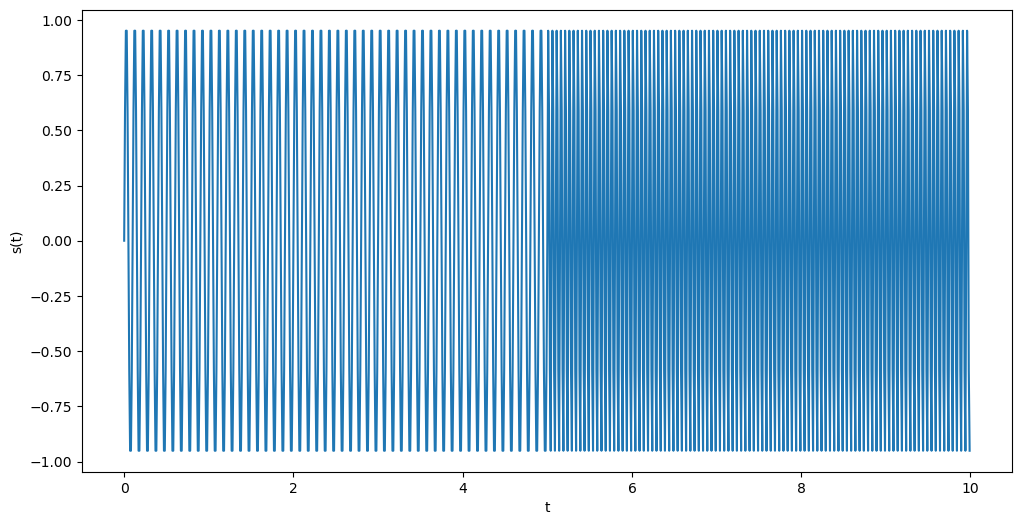

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define constants
T = 5.0     # seconds
Fs = 100.0 # Sample rate 
N = int(T * Fs) # Total number of samples

F1 = 10.0 # Frequency of signal 1
F2 = 20.0 # Frequency of signal 2

# Create a time array for each segment
t1 = np.linspace(0.0, T, N, endpoint=False)
t2 = np.linspace(T, 2*T, N, endpoint=False)

# Generate sinusoidal signal for each segment
s1 = np.sin(F1 * 2 * np.pi * t1)
s2 = np.sin(F2 * 2 * np.pi * t2)

# Combine the signals and the time arrays
s = np.concatenate([s1, s2])
t = np.concatenate([t1, t2])

# Display
plt.figure(figsize=(12,6))
plt.plot(t,s)
plt.xlabel('t')
plt.ylabel('s(t)')
plt.show()

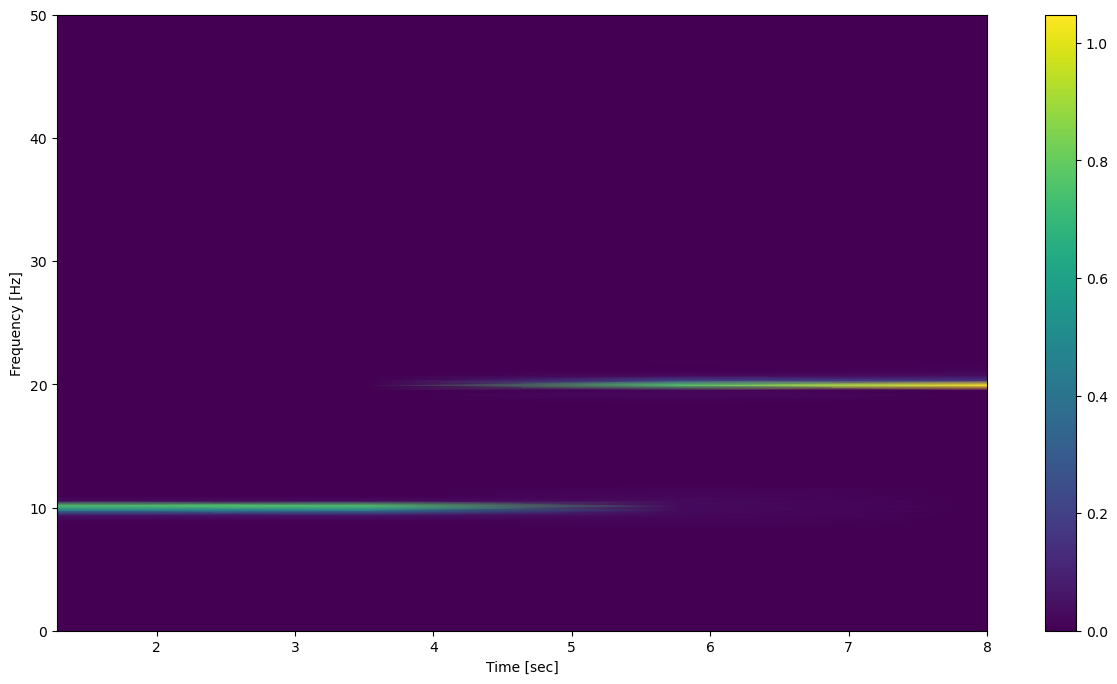

In [11]:
# SciPy implementation

from scipy import signal
import matplotlib.pyplot as plt

f, t, Sxx = signal.spectrogram(s, Fs)
plt.figure(figsize=(15,8))
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.ylim([0, 50])
plt.colorbar()
plt.show()

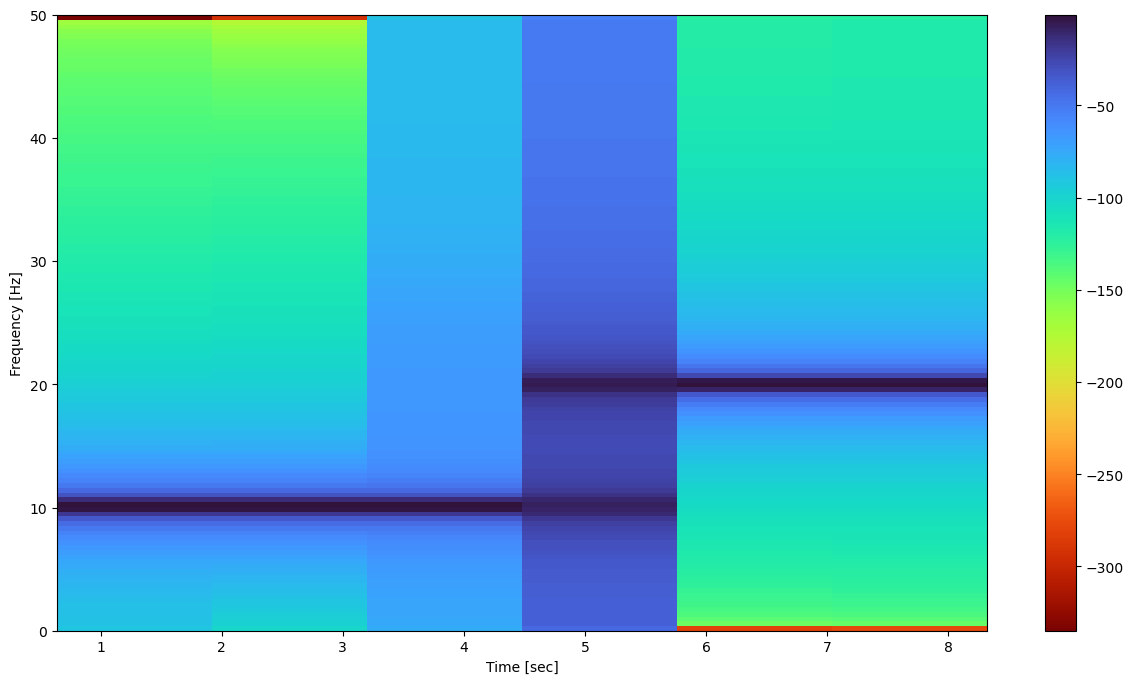

In [12]:
# Matplotlib plotting of spectrogram

plt.figure(figsize=(15,8))
plt.specgram(s, Fs=Fs, cmap='turbo_r')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.ylim([0, 50])
plt.colorbar()
plt.show()

Finally, here is a complete construction, using only `numpy`, that shows the steps of the speectrogram computation:

- split the signal into smaller chunks or frames (often with some overlap),
- apply a window function,
- apply the Fourier Transform to each of these frames.

This results in a series of spectra, which are arranged side by side to form the spectrogram.


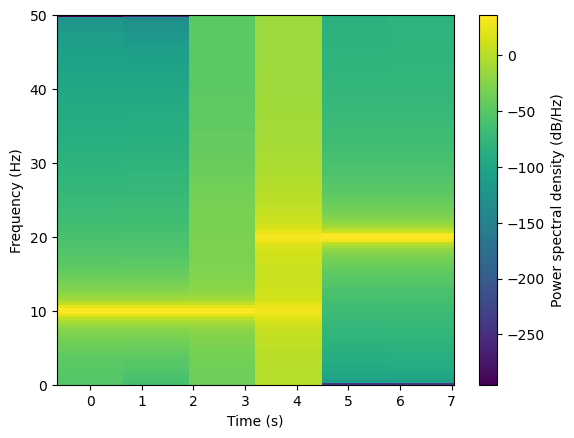

In [14]:
# Define the parameters for the spectrogram
window_size = 256  # Window size for the FFT
overlap    = 128  # Overlap between windows

# Window the signal
window = np.hanning(window_size)
windows = [s[i:i+window_size] * window for i in range(0, len(s)-window_size, window_size-overlap)]

# Compute the FFT for each window
spectrogram = [np.abs(np.fft.rfft(win))**2 for win in windows]

# Transpose the result to have time on the x-axis and frequency on the y-axis
spectrogram = np.array(spectrogram).T

# Plot the spectrogram
frequencies = np.fft.rfftfreq(window_size, d=1.0/Fs)
time = np.arange(len(spectrogram[0])) * (window_size - overlap) / Fs
plt.pcolormesh(time, frequencies, 10 * np.log10(spectrogram))
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.colorbar(label="Power spectral density (dB/Hz)")
plt.ylim([0, Fs/2.])
plt.show()